In [1]:
# Import required modules for project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import chi2_contingency


In [2]:
# Load the dataset into a DataFrame
data = pd.read_csv("bank_data.csv")

In [3]:
data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [4]:
(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [5]:
# Summary statistics
print(data.describe())

                id  expected_recovery_amount  actual_recovery_amount  \
count  1882.000000               1882.000000             1882.000000   
mean   1035.596174               2759.967588             4000.967837   
std     591.458429               2019.826565             4576.506350   
min       6.000000                194.000000              200.425000   
25%     534.250000               1261.250000             1045.190300   
50%    1029.500000               2062.000000             2115.446373   
75%    1551.750000               3569.500000             5417.237207   
max    2056.000000               9964.000000            34398.479710   

               age  
count  1882.000000  
mean     39.650372  
std      15.453072  
min      18.000000  
25%      28.000000  
50%      35.000000  
75%      50.000000  
max      84.000000  


In [6]:
data.dtypes

id                            int64
expected_recovery_amount      int64
actual_recovery_amount      float64
recovery_strategy            object
age                           int64
sex                          object
dtype: object

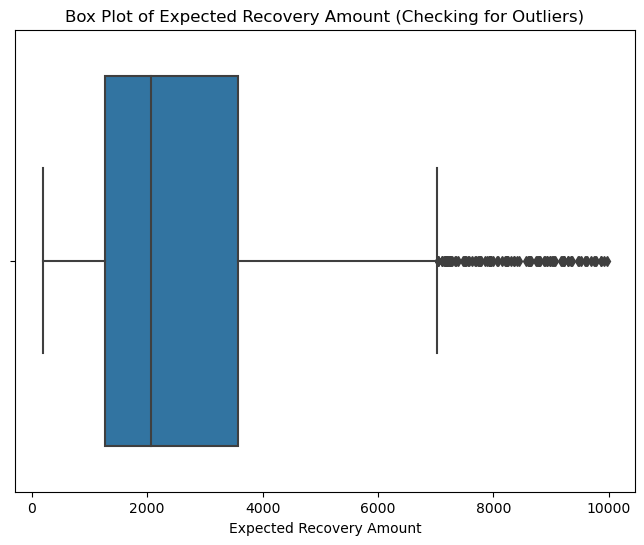

In [7]:
# Create a box plot to check for outliers in the Expected Recovery Amount
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['expected_recovery_amount'])

# Add labels and title
plt.xlabel('Expected Recovery Amount')
plt.title('Box Plot of Expected Recovery Amount (Checking for Outliers)')

# Show the plot
plt.show()

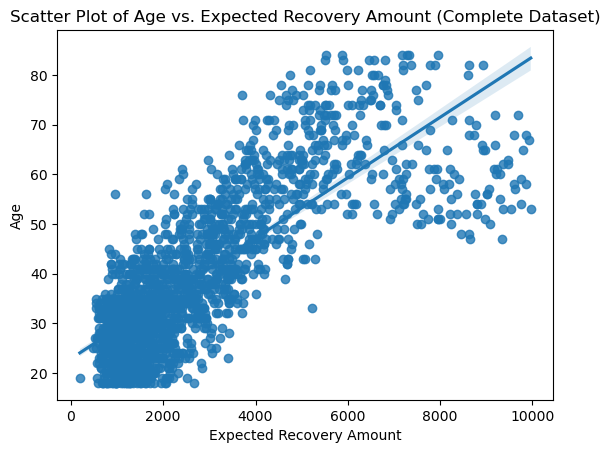

In [8]:
# Create a regression plot of Age vs. Expected Recovery Amount for the complete dataset
sns.regplot(x='expected_recovery_amount', y='age', data=data)

# Add labels and title
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.title('Scatter Plot of Age vs. Expected Recovery Amount (Complete Dataset)')

# Show the plot
plt.show()

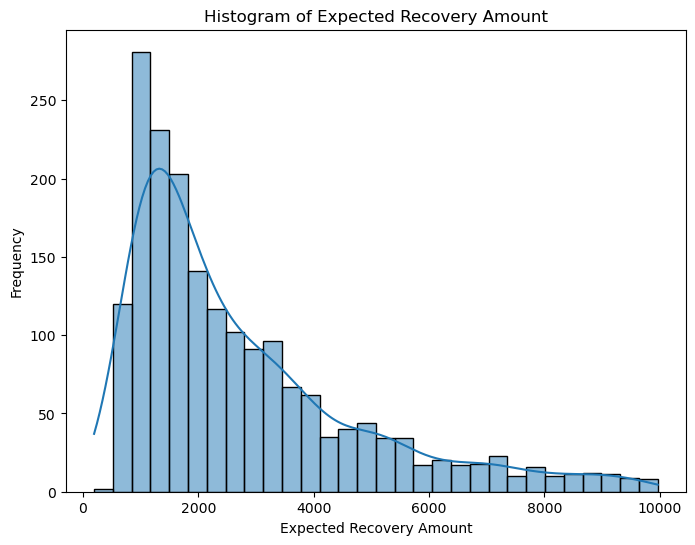

In [9]:
# Create a histogram of Expected Recovery Amount
plt.figure(figsize=(8, 6))
sns.histplot(data['expected_recovery_amount'], bins=30, kde=True)

# Add labels and title
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Expected Recovery Amount')

# Show the plot
plt.show()

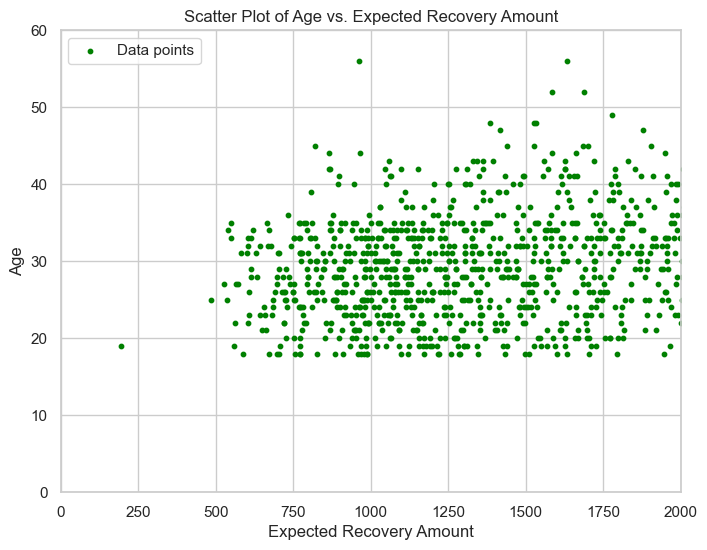

In [10]:
# Set the style for the plot
sns.set(style="whitegrid")

# Scatter plot of Age vs. Expected Recovery Amount
plt.figure(figsize=(8, 6))
plt.scatter(x=data['expected_recovery_amount'], y=data['age'], color="green", marker="o", s=10, label="Data points")
plt.xlim(0, 2000)
plt.ylim(0, 60)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Age")
plt.title("Scatter Plot of Age vs. Expected Recovery Amount")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
#Statistical test: age vs. expected recovery amount

# Define the range from $900 to $1100
range_900_to_1100 = (data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] < 1100)

# Select the data just below and just above the threshold
data_analysis = data[range_900_to_1100]

# Compute average age just below and above the threshold by recovery strategy
average_age_by_recovery_strategy = data_analysis.groupby('recovery_strategy')['age'].mean()

# Display the average age by recovery strategy
print("Average Age by Recovery Strategy:")
print(average_age_by_recovery_strategy)

# Perform Kruskal-Wallis test
Level_0_age = data_analysis[data_analysis['recovery_strategy'] == "Level 0 Recovery"]['age']
Level_1_age = data_analysis[data_analysis['recovery_strategy'] == "Level 1 Recovery"]['age']
kw_statistic, p_value = stats.kruskal(Level_0_age, Level_1_age)

# Print the results of the Kruskal-Wallis test
print("\nKruskal-Wallis Test:")
print("Kruskal-Wallis Statistic:", kw_statistic)
print("P-Value:", p_value)

Average Age by Recovery Strategy:
recovery_strategy
Level 0 Recovery    27.224719
Level 1 Recovery    28.755319
Name: age, dtype: float64

Kruskal-Wallis Test:
Kruskal-Wallis Statistic: 3.4572342749517513
P-Value: 0.06297556896097407


In [12]:
#Statistical test: sex vs. expected recovery amount

# Filter the data within the range $900 to $1100
data_filtered = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] < 1100)]

# Create a crosstabulation of recovery strategy and gender
crosstab = pd.crosstab(data_filtered['recovery_strategy'], data_filtered['sex'])

# Perform the chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(crosstab)

# Print the results
print("Crosstabulation:")
print(crosstab)
print("P-Value:", p_val)

Crosstabulation:
sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       39    55
P-Value: 0.5377947810444592


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


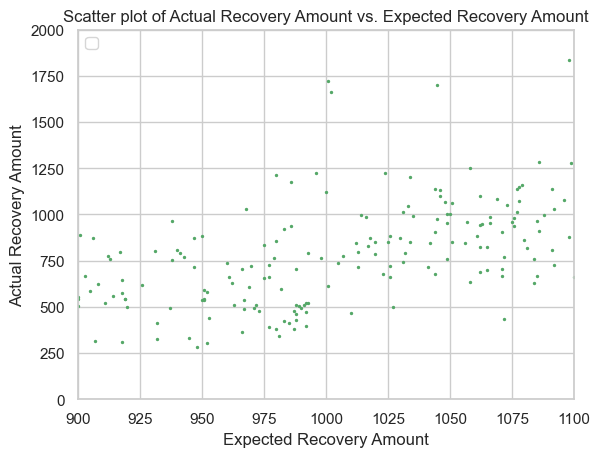

In [13]:
#Exploratory graphical analysis: recovery amount
# Select the data within the range $900 to $1100 for Expected Recovery Amount
data_range_900_1100 = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]

# Scatter plot of Actual Recovery Amount vs. Expected Recovery Amount
plt.scatter(x=data_range_900_1100['expected_recovery_amount'], y=data_range_900_1100['actual_recovery_amount'], c="g", s=2)
plt.xlim(900, 1100)
plt.ylim(0, 2000)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.legend(loc=2)
plt.title("Scatter plot of Actual Recovery Amount vs. Expected Recovery Amount")
plt.show()

In [14]:
#Statistical analysis: recovery amount

# Define the range from $900 to $1100
era_900_1100 = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]

# Compute average actual recovery amount just below and above the threshold
average_actual_recovery = era_900_1100.groupby('recovery_strategy')['actual_recovery_amount'].mean()

# Display the average actual recovery amount just below and above the threshold
print("Average Actual Recovery Amount:")
print(average_actual_recovery)

# Perform Kruskal-Wallis test for the range of $900 to $1100
Level_0_actual = era_900_1100[era_900_1100['recovery_strategy'] == 'Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = era_900_1100[era_900_1100['recovery_strategy'] == 'Level 1 Recovery']['actual_recovery_amount']
kw_statistic_1, p_value_1 = stats.kruskal(Level_0_actual, Level_1_actual)

# Print the Kruskal-Wallis test results
print("\nKruskal-Wallis Test - $900 to $1100 Range:")
print("Kruskal-Wallis Statistic:", kw_statistic_1)
print("P-Value:", p_value_1)

# Repeat for a smaller range of $950 to $1050
era_950_1050 = data[(data['expected_recovery_amount'] < 1050) & (data['expected_recovery_amount'] >= 950)]

# Compute average actual recovery amount just below and above the threshold for the new range
average_actual_recovery_new_range = era_950_1050.groupby('recovery_strategy')['actual_recovery_amount'].mean()

# Display the average actual recovery amount just below and above the threshold for the new range
print("\nAverage Actual Recovery Amount - $950 to $1050 Range:")
print(average_actual_recovery_new_range)

# Perform Kruskal-Wallis test for the range of $950 to $1050
Level_0_actual_new_range = era_950_1050[era_950_1050['recovery_strategy'] == 'Level 0 Recovery']['actual_recovery_amount']
Level_1_actual_new_range = era_950_1050[era_950_1050['recovery_strategy'] == 'Level 1 Recovery']['actual_recovery_amount']
kw_statistic_2, p_value_2 = stats.kruskal(Level_0_actual_new_range, Level_1_actual_new_range)

# Print the Kruskal-Wallis test results for the new range
print("\nKruskal-Wallis Test - $950 to $1050 Range:")
print("Kruskal-Wallis Statistic:", kw_statistic_2)
print("P-Value:", p_value_2)

Average Actual Recovery Amount:
recovery_strategy
Level 0 Recovery    623.017022
Level 1 Recovery    952.750603
Name: actual_recovery_amount, dtype: float64

Kruskal-Wallis Test - $900 to $1100 Range:
Kruskal-Wallis Statistic: 64.89840778685254
P-Value: 7.886077128395961e-16

Average Actual Recovery Amount - $950 to $1050 Range:
recovery_strategy
Level 0 Recovery    626.140273
Level 1 Recovery    947.035496
Name: actual_recovery_amount, dtype: float64

Kruskal-Wallis Test - $950 to $1050 Range:
Kruskal-Wallis Statistic: 30.246000000000038
P-Value: 3.80575314300276e-08


In [15]:
#Regression modeling: no threshold

# Define the range from $900 to $1100
range_900_to_1100 = (data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)

# Select the data just below and just above the threshold
data_analysis = data[range_900_to_1100]

# Define X and y for the linear regression model
X = data_analysis['expected_recovery_amount']
y = data_analysis['actual_recovery_amount']

# Add a constant term to X for the intercept in the regression model
X = sm.add_constant(X)

# Build the linear regression model
model = sm.OLS(y, X).fit()

# Get predictions from the model
predictions = model.predict(X)

# Print out the model summary statistics
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.253
Model:                                OLS   Adj. R-squared:                  0.248
Method:                     Least Squares   F-statistic:                     61.48
Date:                    Sat, 22 Jul 2023   Prob (F-statistic):           3.65e-13
Time:                            02:00:58   Log-Likelihood:                -1286.5
No. Observations:                     184   AIC:                             2577.
Df Residuals:                         182   BIC:                             2583.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [16]:
#Regression modeling: adding true threshold

#Create indicator (0 or 1) for expected recovery amount >= $1000
data['indicator_1000'] = np.where(data['expected_recovery_amount']<1000, 0, 1)
era_900_1100 = data.loc[(data['expected_recovery_amount']<1100) & 
                      (data['expected_recovery_amount']>=900)]

# Define X and y
X = era_900_1100[['expected_recovery_amount','indicator_1000']]
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Sat, 22 Jul 2023   Prob (F-statistic):           1.83e-15
Time:                            02:01:00   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.3440    626.274      0.005      0.996   -1232.440    1239.128
expected_recovery_amount     0.6430      0.655      0.981      0.328      -0.650       1.936
indicator_1000             277.6344     74.043      3.750      0.000     131.530     423.739
==============================================================================
Omnibus:                       65.977   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.537
Skew:                           1.510   Prob(JB):                     3.12e-41
Kurtosis:                       6.917   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#Regression modeling: adjusting the window

# Redefine era_950_1050 so the indicator variable is included
era_950_1050 = data.loc[(data['expected_recovery_amount']<1050) & 
                      (data['expected_recovery_amount']>=950)]

# Define X and y 
X = era_950_1050[['expected_recovery_amount','indicator_1000']]
y = era_950_1050['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Sat, 22 Jul 2023   Prob (F-statistic):           1.12e-07
Time:                            02:01:02   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -279.5243   1840.707     -0.152      0.880   -3933.298    3374.250
expected_recovery_amount     0.9189      1.886      0.487      0.627      -2.825       4.663
indicator_1000             286.5337    111.352      2.573      0.012      65.502     507.566
==============================================================================
Omnibus:                       39.302   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.258
Skew:                           1.564   Prob(JB):                     1.37e-18
Kurtosis:                       6.186   Cond. No.                     6.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""